# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [5]:
train['Stage'].value_counts()

3.0    3153
4.0    2703
2.0    1652
1.0     397
Name: Stage, dtype: int64

In [6]:
len(train.id.unique())

7905

In [7]:
numerical_train = train[train.dtypes[train.dtypes != 'O'].index.tolist()[1:-1] ]
categorical_train = train[train.dtypes[train.dtypes == 'O'].index.tolist() + ['Stage']]

In [8]:
numerical_train

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0        999  21532        2.3        316.0     3.35   172.0    1601.0   
1       2574  19237        0.9        364.0     3.54    63.0    1440.0   
2       3428  13727        3.3        299.0     3.55   131.0    1029.0   
3       2576  18460        0.6        256.0     3.50    58.0    1653.0   
4        788  16658        1.1        346.0     3.65    63.0    1181.0   
...      ...    ...        ...          ...      ...     ...       ...   
7900    1166  16839        0.8        309.0     3.56    38.0    1629.0   
7901    1492  17031        0.9        260.0     3.43    62.0    1440.0   
7902    1576  25873        2.0        225.0     3.19    51.0     933.0   
7903    3584  22960        0.7        248.0     2.75    32.0    1003.0   
7904    1978  19237        0.7        256.0     3.23    22.0     645.0   

        SGOT  Tryglicerides  Platelets  Prothrombin  
0     179.80           63.0      394.0          9.7  
1     134.85           88.0      361.0         11.0  
2     119.35           50.0      199.0         11.7  
3      71.30           96.0      269.0         10.7  
4     125.55           96.0      298.0         10.6  
...      ...            ...        ...          ...  
7900   79.05          224.0      344.0          9.9  
7901  142.00           78.0      277.0         10.0  
7902   69.75           62.0      200.0         12.7  
7903   57.35          118.0      221.0         10.6  
7904   74.40           85.0      336.0         10.3  

[7905 rows x 11 columns]

In [9]:
categorical_train

Drug Sex Ascites Hepatomegaly Spiders Edema Status  Stage
0     D-penicillamine   M       N            N       N     N      D    3.0
1             Placebo   F       N            N       N     N      C    3.0
2             Placebo   F       N            Y       Y     Y      D    4.0
3             Placebo   F       N            N       N     N      C    3.0
4             Placebo   F       N            Y       N     N      C    4.0
...               ...  ..     ...          ...     ...   ...    ...    ...
7900  D-penicillamine   F       N            N       N     N      C    2.0
7901          Placebo   F       N            Y       N     N      C    4.0
7902  D-penicillamine   F       N            N       Y     S      D    2.0
7903  D-penicillamine   M       N            Y       N     N      D    4.0
7904  D-penicillamine   F       N            N       N     N      C    3.0

[7905 rows x 8 columns]

[Text(0, 0, 'D'), Text(1, 0, 'C'), Text(2, 0, 'CL')]

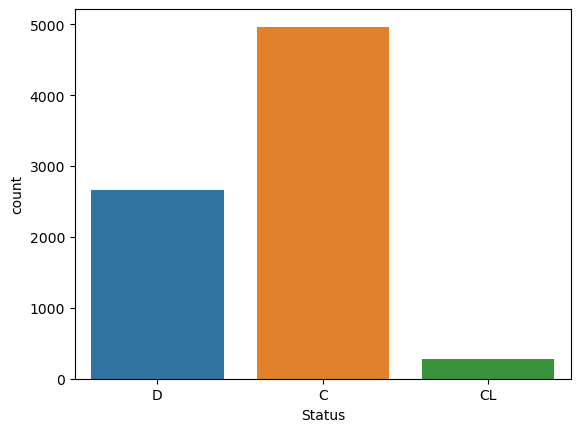

In [10]:
sns_name = sns.countplot(categorical_train[['Status', 'Drug']], x='Status')
sns_name.set_xticklabels(sns_name.get_xticklabels(), rotation=0)

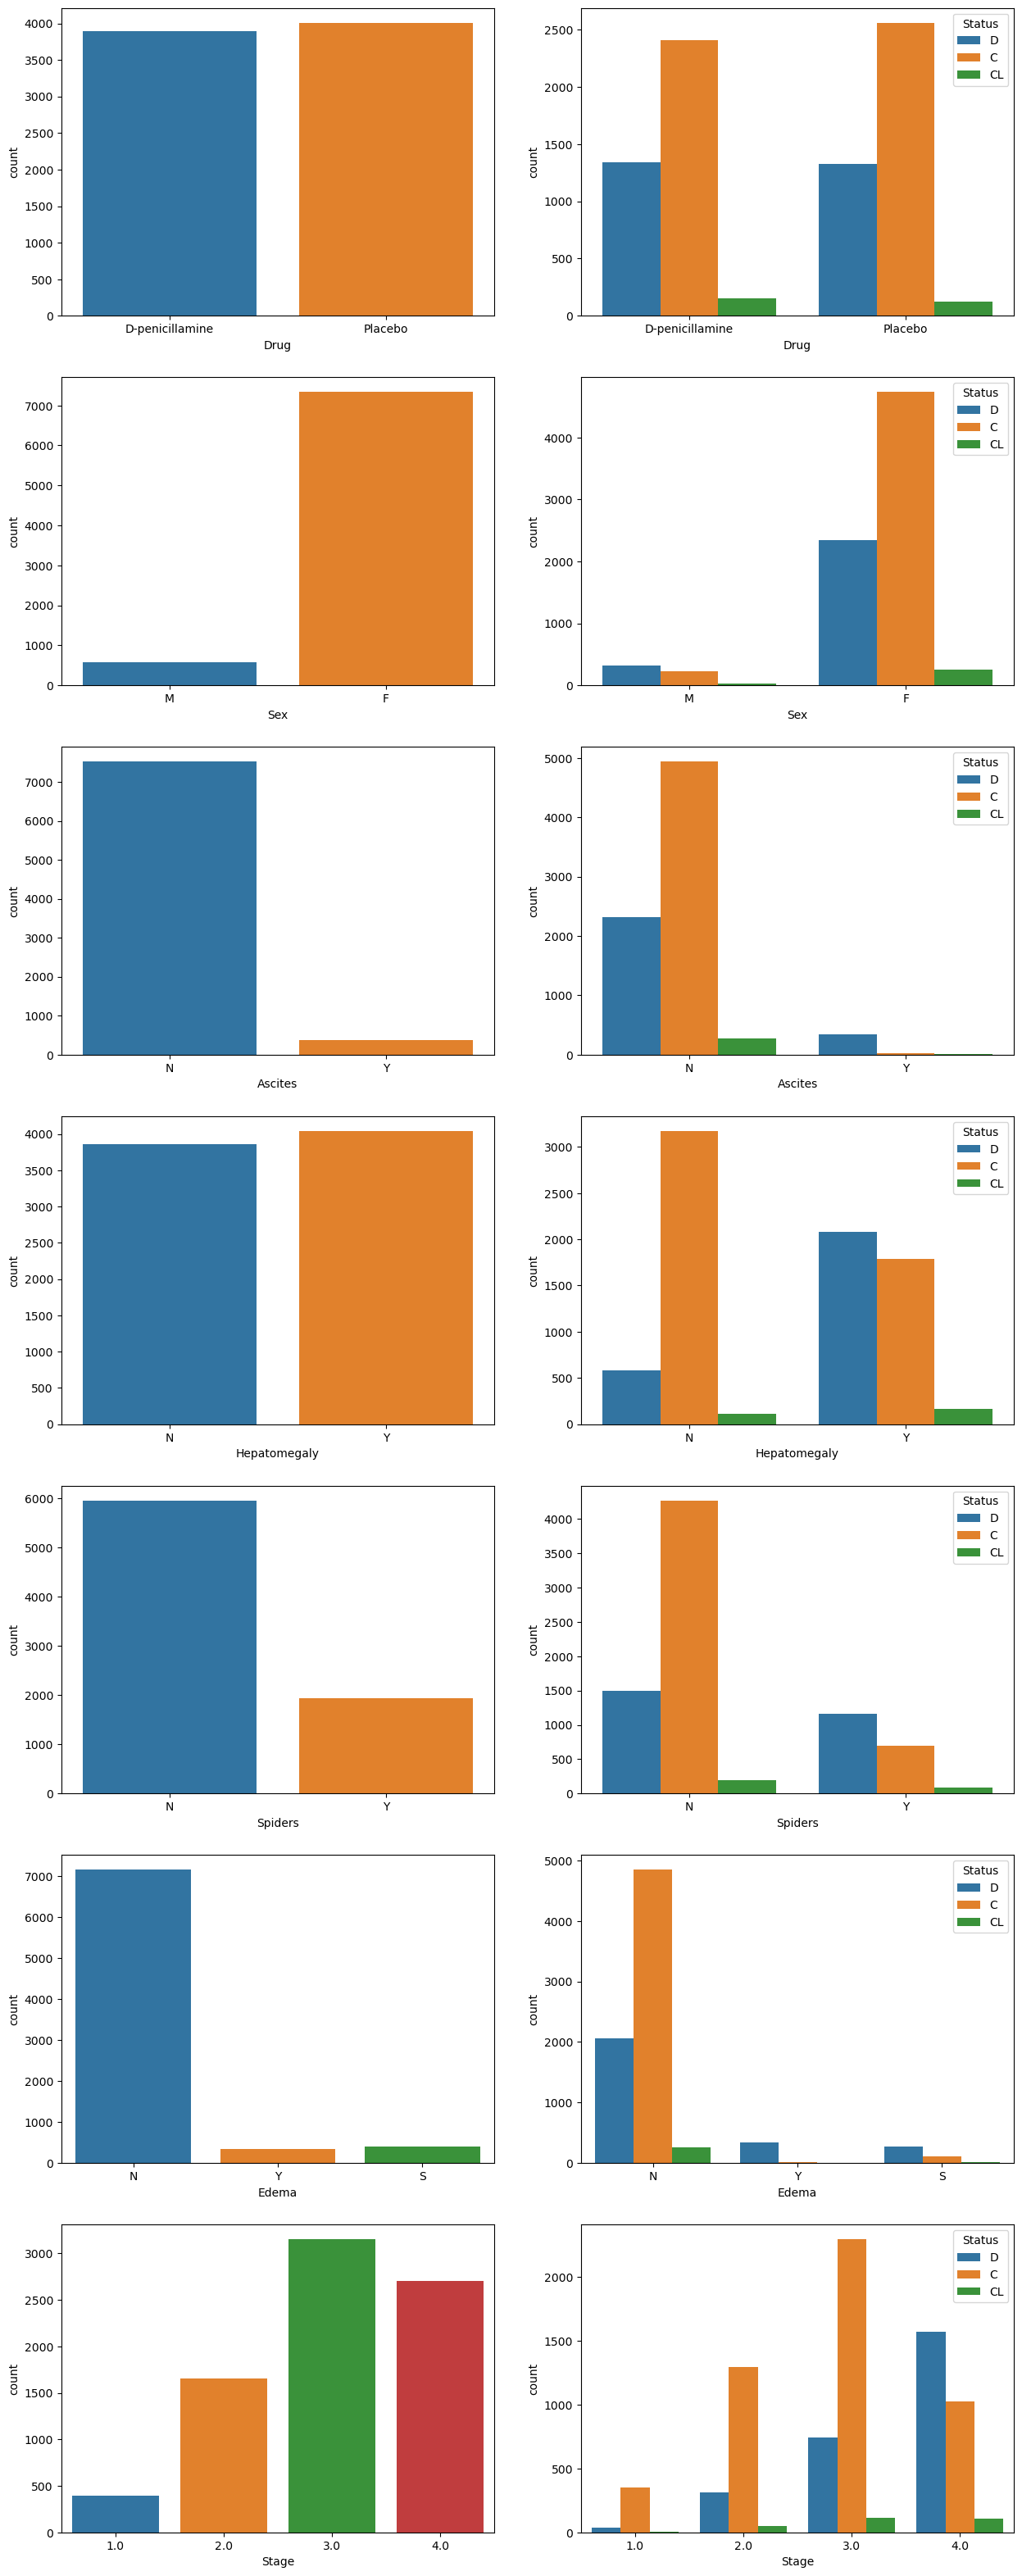

In [11]:
fig, ax = plt.subplots(categorical_train.shape[1]-1,2,figsize=(15,40))

c_a = categorical_train.columns.tolist()
c_a.pop(-2)
for i, column_name in zip(ax,c_a):
    
    sns_name = sns.countplot(categorical_train[[column_name, 'Status']], x=column_name, ax=i[0])
    sns_name.set_xticklabels(sns_name.get_xticklabels(), rotation=0)
    
    sns_name = sns.countplot(categorical_train[[column_name, 'Status']], x=column_name, hue='Status', ax=i[1])
    sns_name.set_xticklabels(sns_name.get_xticklabels(), rotation=0)

In [12]:
numerical_train.describe()

N_Days           Age    Bilirubin  Cholesterol      Albumin  \
count  7905.000000   7905.000000  7905.000000  7905.000000  7905.000000   
mean   2030.173308  18373.146490     2.594485   350.561923     3.548323   
std    1094.233744   3679.958739     3.812960   195.379344     0.346171   
min      41.000000   9598.000000     0.300000   120.000000     1.960000   
25%    1230.000000  15574.000000     0.700000   248.000000     3.350000   
50%    1831.000000  18713.000000     1.100000   298.000000     3.580000   
75%    2689.000000  20684.000000     3.000000   390.000000     3.770000   
max    4795.000000  28650.000000    28.000000  1775.000000     4.640000   

            Copper      Alk_Phos         SGOT  Tryglicerides    Platelets  \
count  7905.000000   7905.000000  7905.000000    7905.000000  7905.000000   
mean     83.902846   1816.745250   114.604602     115.340164   265.228969   
std      75.899266   1903.750657    48.790945      52.530402    87.465579   
min       4.000000    289.000000    26.350000      33.000000    62.000000   
25%      39.000000    834.000000    75.950000      84.000000   211.000000   
50%      63.000000   1181.000000   108.500000     104.000000   265.000000   
75%     102.000000   1857.000000   137.950000     139.000000   316.000000   
max     588.000000  13862.400000   457.250000     598.000000   563.000000   

       Prothrombin  
count  7905.000000  
mean     10.629462  
std       0.781735  
min       9.000000  
25%      10.000000  
50%      10.600000  
75%      11.000000  
max      18.000000

In [13]:
corr = numerical_train.corr()

for i in range(len(corr)):
    corr.iloc[i,i] = 0
    
np.abs(corr).max().sort_values(ascending=False)

Bilirubin        0.442223
Copper           0.442223
SGOT             0.368653
N_Days           0.346434
Cholesterol      0.326864
Tryglicerides    0.315681
Albumin          0.303191
Prothrombin      0.294325
Platelets        0.169741
Age              0.141705
Alk_Phos         0.131317
dtype: float64

<Axes: >

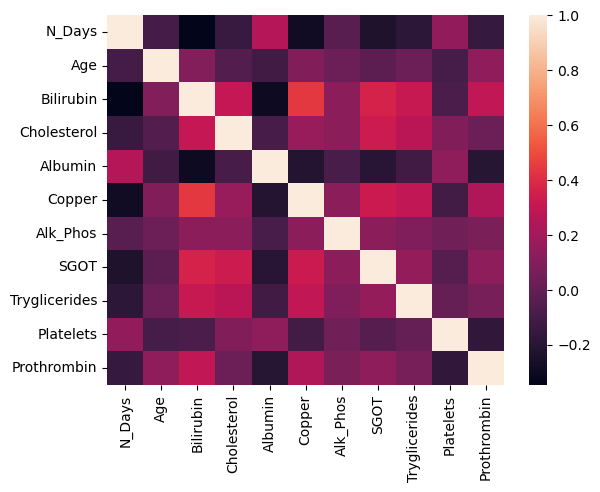

In [14]:
sns.heatmap(numerical_train.corr())

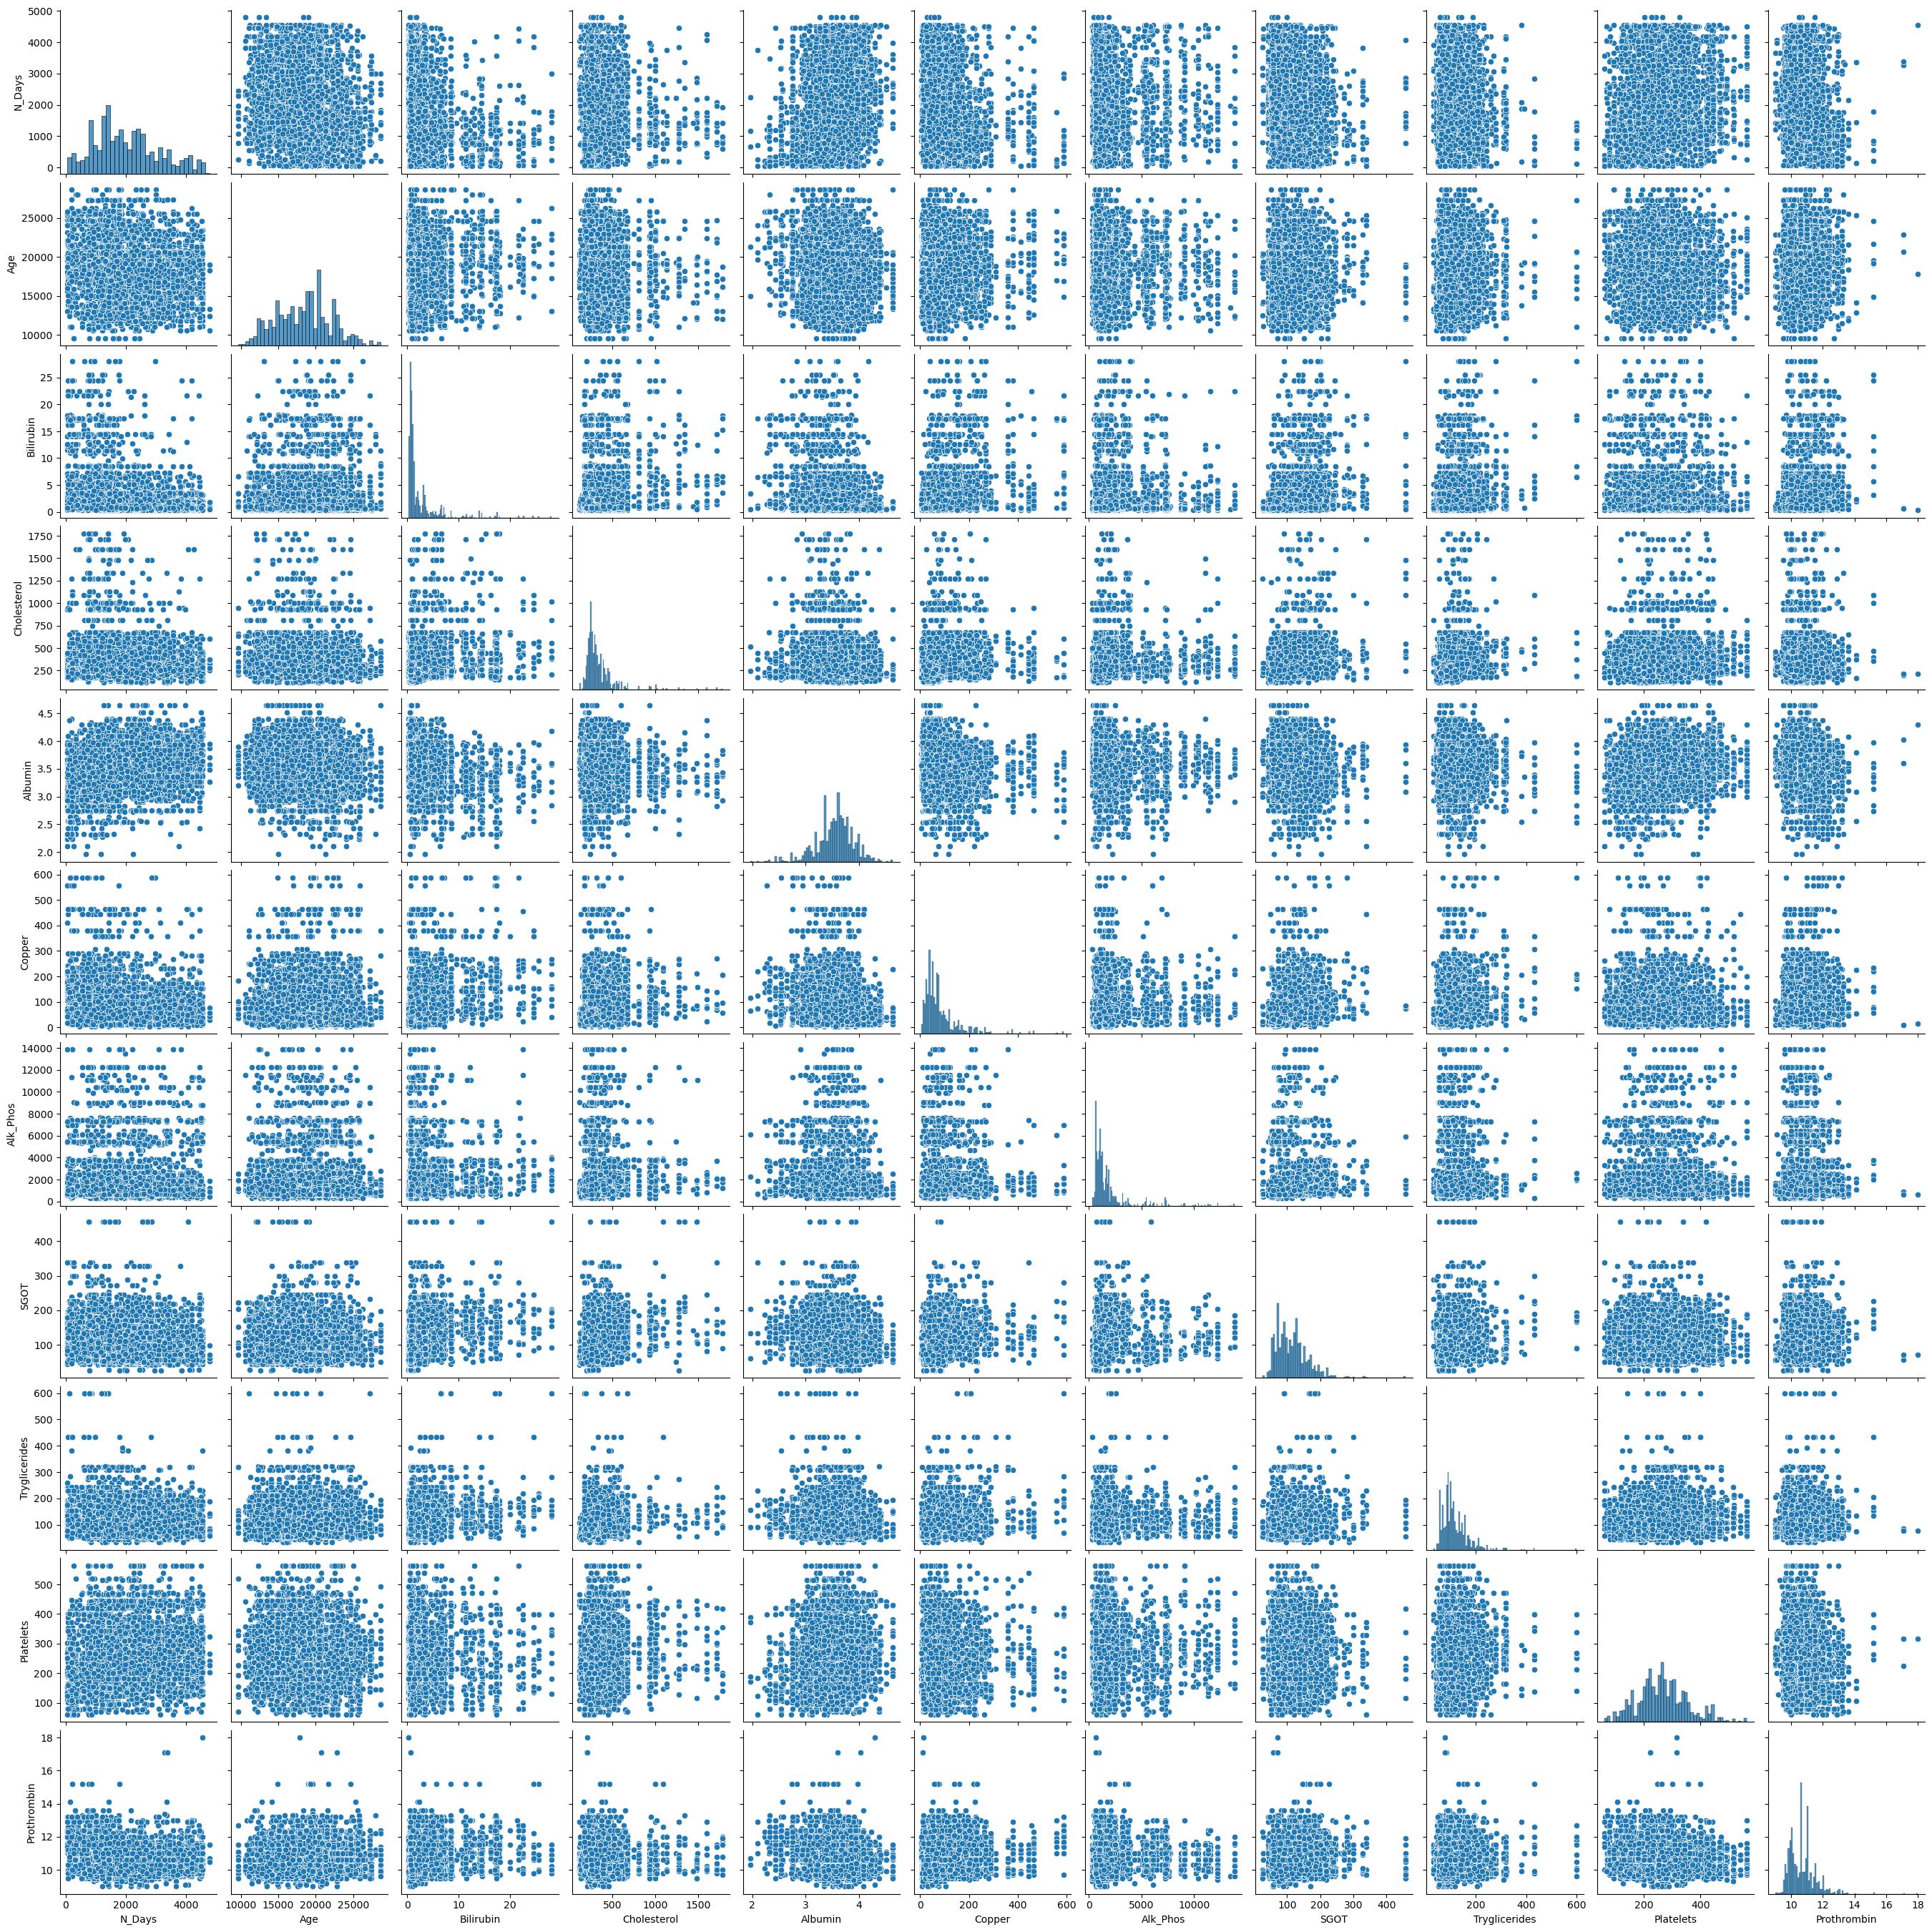

In [15]:
sns.pairplot(numerical_train)

/tmp/ipykernel_7357/2910866252.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  numerical_train.hist(ax=ax)


array([[<Axes: title={'center': 'N_Days'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Bilirubin'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Copper'}>],
       [<Axes: title={'center': 'Alk_Phos'}>,
        <Axes: title={'center': 'SGOT'}>,
        <Axes: title={'center': 'Tryglicerides'}>],
       [<Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Prothrombin'}>, <Axes: >]], dtype=object)

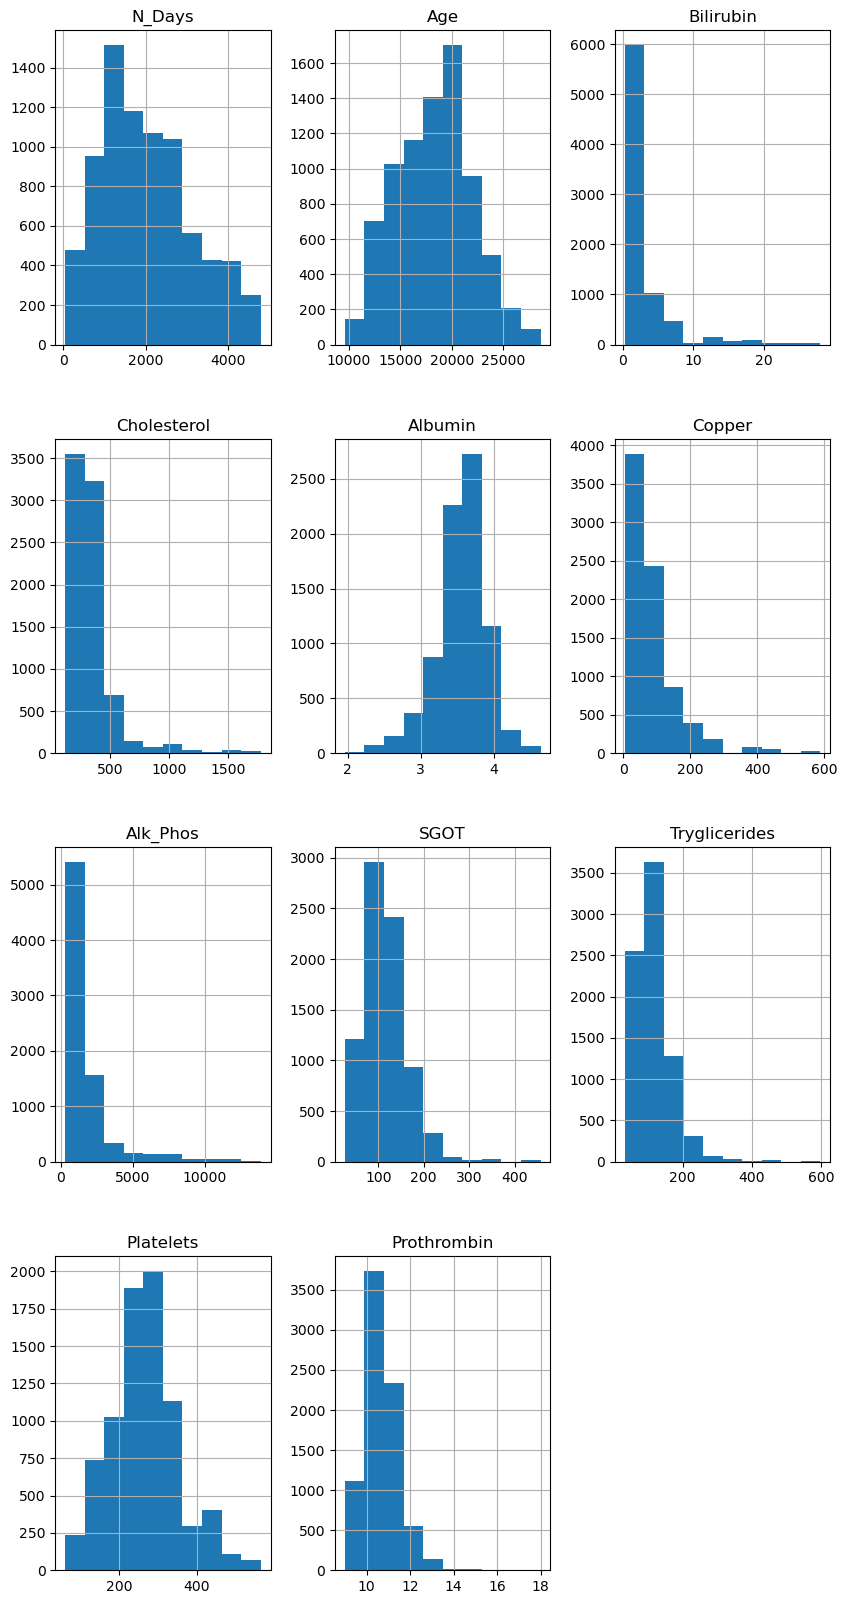

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,20))

numerical_train.hist(ax=ax)

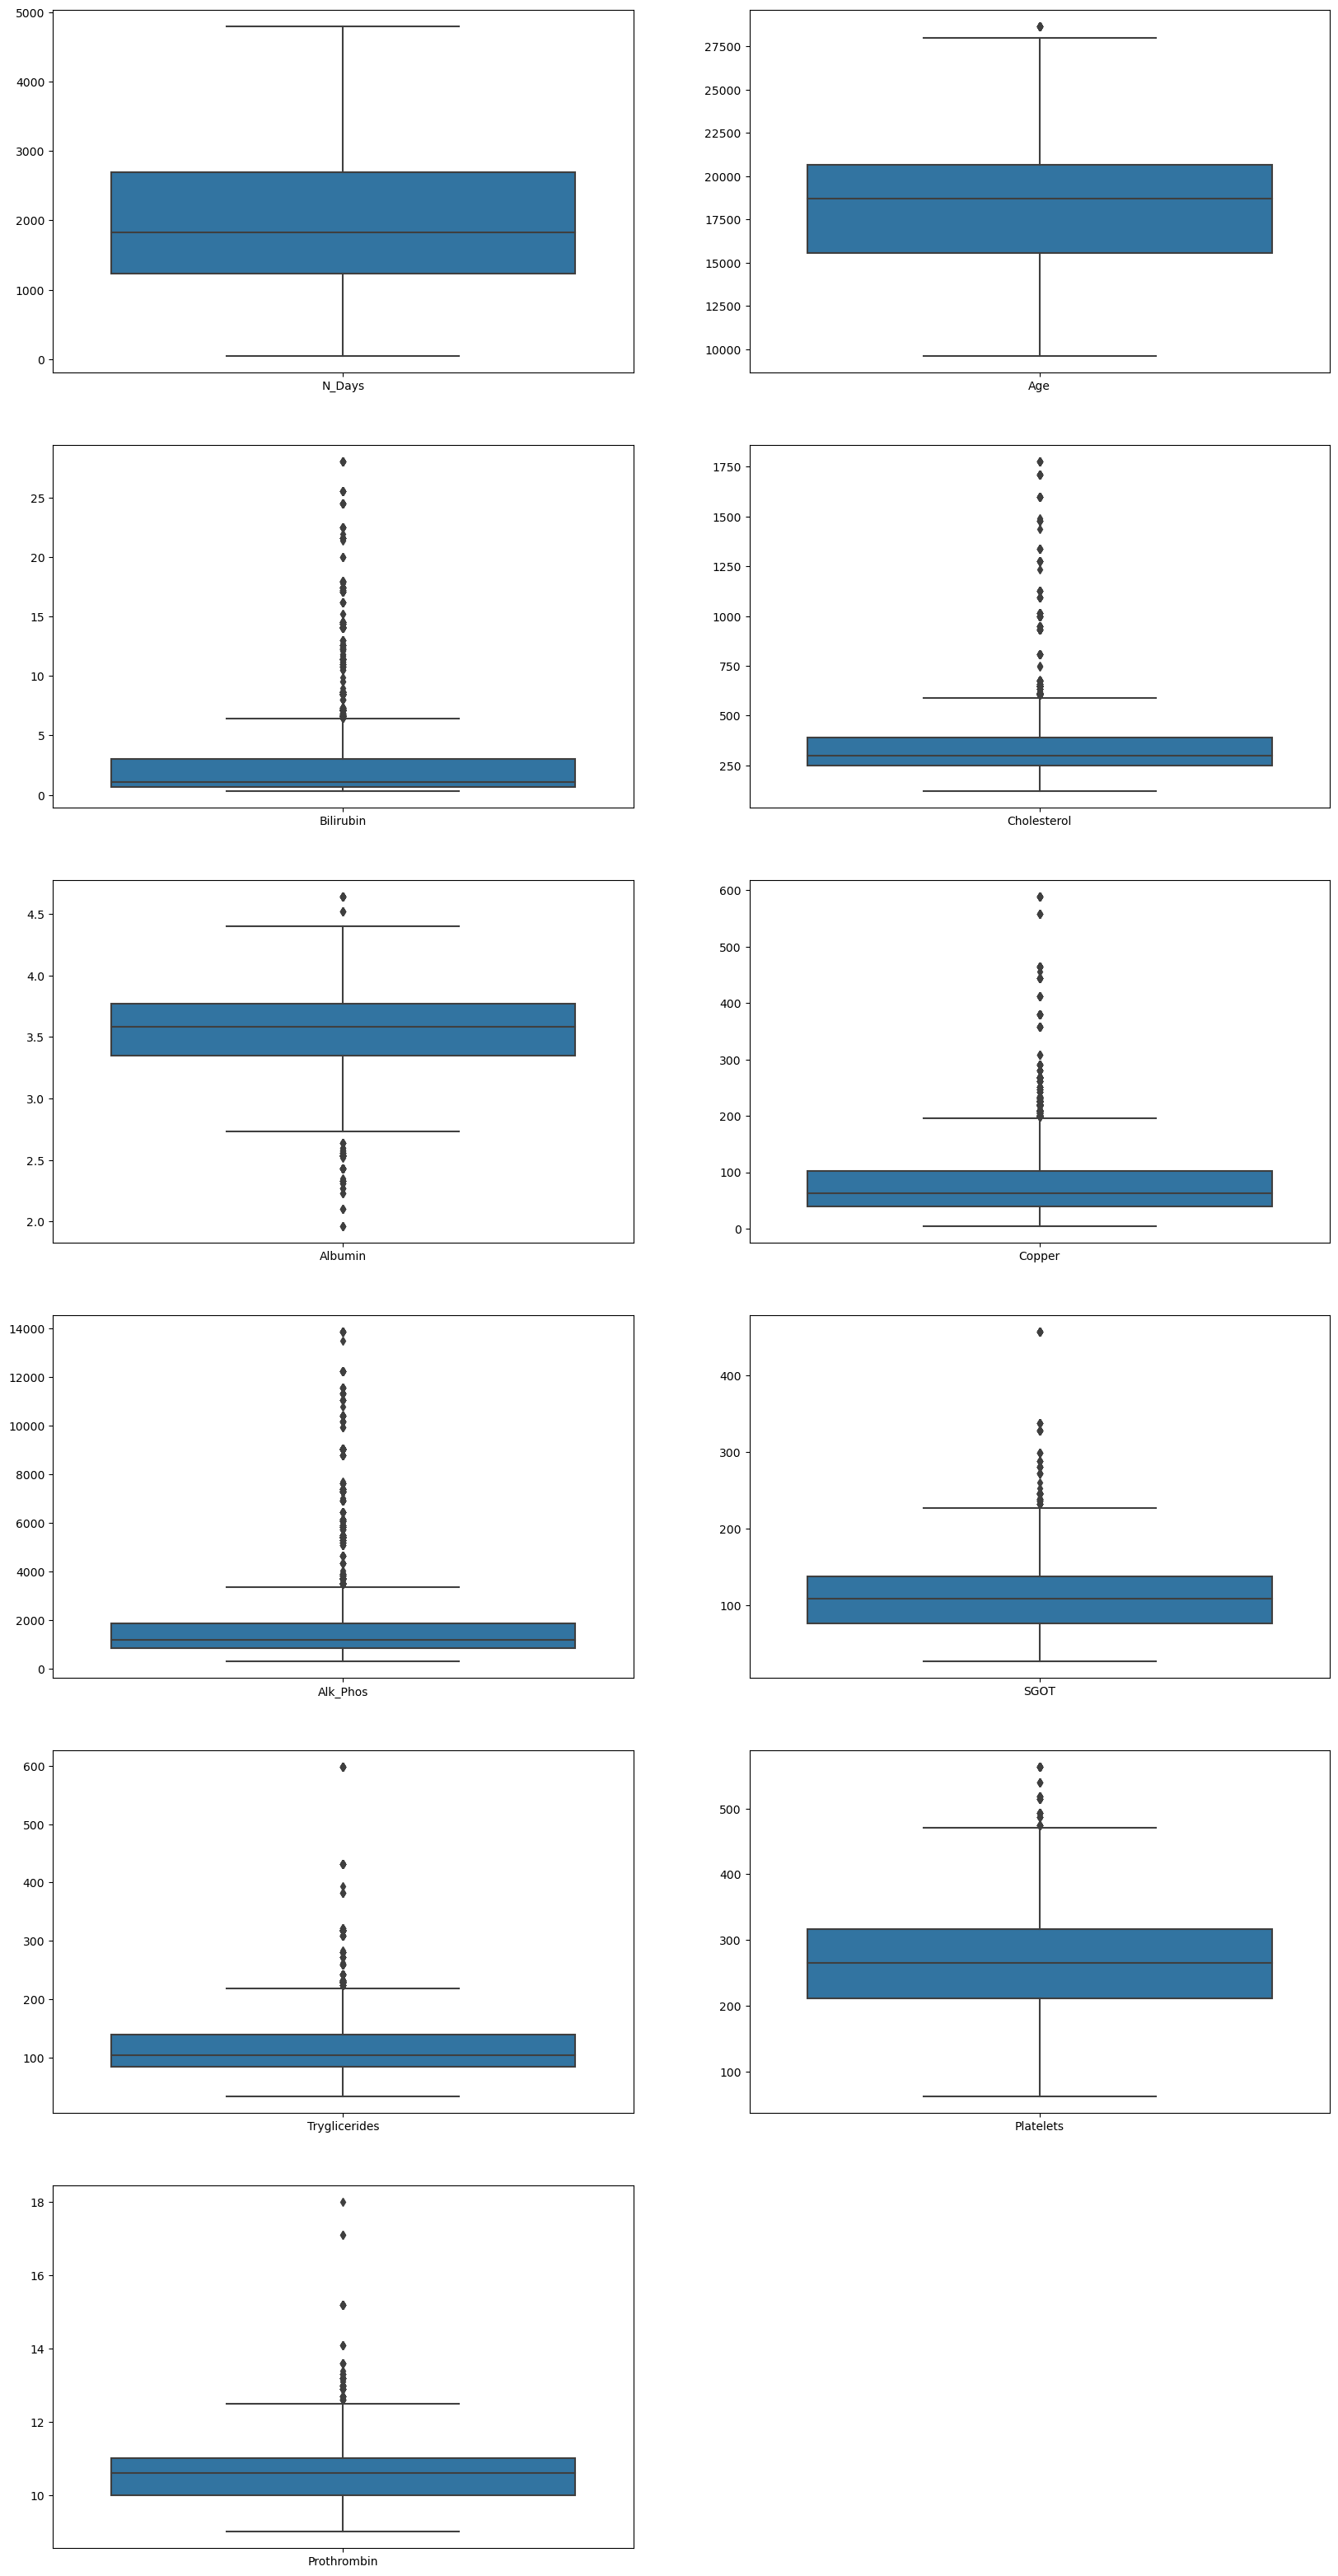

In [17]:
fig, ax = plt.subplots(int(numerical_train.shape[1]/2)+1, 2, figsize=(20,40))
ax = ax.flatten()
ax[-1].set_axis_off()

for i, name in zip(ax[:-1], numerical_train.columns.tolist()):
    sns.boxplot(numerical_train[[name]], ax=i)

In [18]:
counts = pd.DataFrame()
for i in range(8):
    print(categorical_train.iloc[:,i].value_counts(normalize=True))
    print('\n\n')

Placebo            0.507274
D-penicillamine    0.492726
Name: Drug, dtype: float64



F    0.92802
M    0.07198
Name: Sex, dtype: float64



N    0.951929
Y    0.048071
Name: Ascites, dtype: float64



Y    0.511322
N    0.488678
Name: Hepatomegaly, dtype: float64



N    0.754712
Y    0.245288
Name: Spiders, dtype: float64



N    0.905882
S    0.050474
Y    0.043643
Name: Edema, dtype: float64



C     0.628083
D     0.337128
CL    0.034788
Name: Status, dtype: float64



3.0    0.398861
4.0    0.341935
2.0    0.208982
1.0    0.050221
Name: Stage, dtype: float64





In [19]:
test = pd.read_csv('test.csv')

In [20]:
test.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0  7905    3839  D-penicillamine  19724   F       N            Y       N   
1  7906    2468  D-penicillamine  14975   F       N            N       N   
2  7907      51          Placebo  13149   F       N            Y       N   
3  7908    2330  D-penicillamine  20510   F       N            N       N   
4  7909    1615  D-penicillamine  21904   F       N            Y       N   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        1.2        546.0     3.37    65.0    1636.0  151.90   
1     N        1.1        660.0     4.22    94.0    1257.0  151.90   
2     Y        2.0        151.0     2.96    46.0     961.0   69.75   
3     N        0.6        293.0     3.85    40.0     554.0  125.55   
4     N        1.4        277.0     2.97   121.0    1110.0  125.00   

   Tryglicerides  Platelets  Prothrombin  Stage  
0           90.0      430.0         10.6    2.0  
1          155.0      227.0         10.0    2.0  
2          101.0      213.0         13.0    4.0  
3           56.0      270.0         10.6    2.0  
4          126.0      221.0          9.8    1.0

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [22]:
categorical_train.columns.tolist()[:-1]

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']

In [23]:
categorical_train['Drug'].unique()

array(['D-penicillamine', 'Placebo'], dtype=object)

In [24]:
encoders = []
cat_train_trans = pd.DataFrame()
cat_test_trans = pd.DataFrame()

for i in categorical_train.columns.tolist()[:-2]:
    if len(categorical_train[i].unique()) == 2:
        encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
        
        cat_train_trans = pd.concat([cat_train_trans, pd.DataFrame(encoder.fit_transform(categorical_train[i].iloc[:].values.reshape(-1,1)), columns=[i])], axis=1)
        cat_test_trans = pd.concat([cat_test_trans, pd.DataFrame(encoder.transform(test[i].iloc[:].values.reshape(-1,1)), columns=[i])], axis=1)
        encoders.append(encoder)
    else:
        encoder = OneHotEncoder(drop=None, sparse_output=False) #drop='first'
        
        cat_train_trans = pd.concat([cat_train_trans, pd.DataFrame(encoder.fit_transform(categorical_train[i].iloc[:].values.reshape(-1,1)), columns=[
            i+'_0', i+'_1', i+'_2'])], axis=1)
        cat_test_trans = pd.concat([cat_test_trans, pd.DataFrame(encoder.transform(test[i].iloc[:].values.reshape(-1,1)), columns=[
            i+'_0', i+'_1', i+'_2'])], axis=1)
        encoders.append(encoder)

In [25]:
cat_train_trans = pd.concat([cat_train_trans, categorical_train['Stage']], axis=1)
cat_test_trans = pd.concat([cat_test_trans, test['Stage']], axis=1)

In [26]:
encoder = LabelEncoder()

cat_train_trans = pd.concat([cat_train_trans, pd.DataFrame(encoder.fit_transform(categorical_train['Status'].iloc[:].values.ravel()), columns=['Status'])], axis=1)
encoders.append(encoder)

In [27]:
cat_train_trans

Drug  Sex  Ascites  Hepatomegaly  Spiders  Edema_0  Edema_1  Edema_2  \
0      0.0  1.0      0.0           0.0      0.0      1.0      0.0      0.0   
1      1.0  0.0      0.0           0.0      0.0      1.0      0.0      0.0   
2      1.0  0.0      0.0           1.0      1.0      0.0      0.0      1.0   
3      1.0  0.0      0.0           0.0      0.0      1.0      0.0      0.0   
4      1.0  0.0      0.0           1.0      0.0      1.0      0.0      0.0   
...    ...  ...      ...           ...      ...      ...      ...      ...   
7900   0.0  0.0      0.0           0.0      0.0      1.0      0.0      0.0   
7901   1.0  0.0      0.0           1.0      0.0      1.0      0.0      0.0   
7902   0.0  0.0      0.0           0.0      1.0      0.0      1.0      0.0   
7903   0.0  1.0      0.0           1.0      0.0      1.0      0.0      0.0   
7904   0.0  0.0      0.0           0.0      0.0      1.0      0.0      0.0   

      Stage  Status  
0       3.0       2  
1       3.0       0  
2       4.0       2  
3       3.0       0  
4       4.0       0  
...     ...     ...  
7900    2.0       0  
7901    4.0       0  
7902    2.0       2  
7903    4.0       2  
7904    3.0       0  

[7905 rows x 10 columns]

In [28]:
cat_test_trans

Drug  Sex  Ascites  Hepatomegaly  Spiders  Edema_0  Edema_1  Edema_2  \
0      0.0  0.0      0.0           1.0      0.0      1.0      0.0      0.0   
1      0.0  0.0      0.0           0.0      0.0      1.0      0.0      0.0   
2      1.0  0.0      0.0           1.0      0.0      0.0      0.0      1.0   
3      0.0  0.0      0.0           0.0      0.0      1.0      0.0      0.0   
4      0.0  0.0      0.0           1.0      0.0      1.0      0.0      0.0   
...    ...  ...      ...           ...      ...      ...      ...      ...   
5266   1.0  0.0      0.0           0.0      0.0      1.0      0.0      0.0   
5267   1.0  0.0      0.0           0.0      0.0      1.0      0.0      0.0   
5268   0.0  0.0      0.0           1.0      0.0      1.0      0.0      0.0   
5269   1.0  0.0      0.0           0.0      0.0      1.0      0.0      0.0   
5270   0.0  0.0      0.0           0.0      0.0      1.0      0.0      0.0   

      Stage  
0       2.0  
1       2.0  
2       4.0  
3       2.0  
4       1.0  
...     ...  
5266    3.0  
5267    3.0  
5268    3.0  
5269    1.0  
5270    2.0  

[5271 rows x 9 columns]

In [29]:
preprocessed_train = pd.concat([numerical_train, cat_train_trans], axis=1)
preprocessed_test = pd.concat([test['id'], test[numerical_train.columns.tolist()]], axis=1)
preprocessed_test = pd.concat([preprocessed_test, cat_test_trans], axis=1)

In [30]:
preprocessed_train

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0        999  21532        2.3        316.0     3.35   172.0    1601.0   
1       2574  19237        0.9        364.0     3.54    63.0    1440.0   
2       3428  13727        3.3        299.0     3.55   131.0    1029.0   
3       2576  18460        0.6        256.0     3.50    58.0    1653.0   
4        788  16658        1.1        346.0     3.65    63.0    1181.0   
...      ...    ...        ...          ...      ...     ...       ...   
7900    1166  16839        0.8        309.0     3.56    38.0    1629.0   
7901    1492  17031        0.9        260.0     3.43    62.0    1440.0   
7902    1576  25873        2.0        225.0     3.19    51.0     933.0   
7903    3584  22960        0.7        248.0     2.75    32.0    1003.0   
7904    1978  19237        0.7        256.0     3.23    22.0     645.0   

        SGOT  Tryglicerides  Platelets  ...  Drug  Sex  Ascites  Hepatomegaly  \
0     179.80           63.0      394.0  ...   0.0  1.0      0.0           0.0   
1     134.85           88.0      361.0  ...   1.0  0.0      0.0           0.0   
2     119.35           50.0      199.0  ...   1.0  0.0      0.0           1.0   
3      71.30           96.0      269.0  ...   1.0  0.0      0.0           0.0   
4     125.55           96.0      298.0  ...   1.0  0.0      0.0           1.0   
...      ...            ...        ...  ...   ...  ...      ...           ...   
7900   79.05          224.0      344.0  ...   0.0  0.0      0.0           0.0   
7901  142.00           78.0      277.0  ...   1.0  0.0      0.0           1.0   
7902   69.75           62.0      200.0  ...   0.0  0.0      0.0           0.0   
7903   57.35          118.0      221.0  ...   0.0  1.0      0.0           1.0   
7904   74.40           85.0      336.0  ...   0.0  0.0      0.0           0.0   

      Spiders  Edema_0  Edema_1  Edema_2  Stage  Status  
0         0.0      1.0      0.0      0.0    3.0       2  
1         0.0      1.0      0.0      0.0    3.0       0  
2         1.0      0.0      0.0      1.0    4.0       2  
3         0.0      1.0      0.0      0.0    3.0       0  
4         0.0      1.0      0.0      0.0    4.0       0  
...       ...      ...      ...      ...    ...     ...  
7900      0.0      1.0      0.0      0.0    2.0       0  
7901      0.0      1.0      0.0      0.0    4.0       0  
7902      1.0      0.0      1.0      0.0    2.0       2  
7903      0.0      1.0      0.0      0.0    4.0       2  
7904      0.0      1.0      0.0      0.0    3.0       0  

[7905 rows x 21 columns]

In [31]:
preprocessed_test

id  N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0      7905    3839  19724        1.2        546.0     3.37    65.0    1636.0   
1      7906    2468  14975        1.1        660.0     4.22    94.0    1257.0   
2      7907      51  13149        2.0        151.0     2.96    46.0     961.0   
3      7908    2330  20510        0.6        293.0     3.85    40.0     554.0   
4      7909    1615  21904        1.4        277.0     2.97   121.0    1110.0   
...     ...     ...    ...        ...          ...      ...     ...       ...   
5266  13171    2870  12279        1.3        302.0     3.43    75.0    1345.0   
5267  13172    1770  24803        0.5        219.0     4.09   121.0     663.0   
5268  13173    3707  16990        0.8        315.0     4.09    13.0    1637.0   
5269  13174    1216  11773        0.7        329.0     3.80    52.0     678.0   
5270  13175    2272  21600        2.0        232.0     3.42    18.0    1636.0   

        SGOT  Tryglicerides  ...  Prothrombin  Drug  Sex  Ascites  \
0     151.90           90.0  ...         10.6   0.0  0.0      0.0   
1     151.90          155.0  ...         10.0   0.0  0.0      0.0   
2      69.75          101.0  ...         13.0   1.0  0.0      0.0   
3     125.55           56.0  ...         10.6   0.0  0.0      0.0   
4     125.00          126.0  ...          9.8   0.0  0.0      0.0   
...      ...            ...  ...          ...   ...  ...      ...   
5266  145.00           44.0  ...         10.6   1.0  0.0      0.0   
5267   79.05           94.0  ...          9.7   1.0  0.0      0.0   
5268  170.50           70.0  ...         10.9   0.0  0.0      0.0   
5269   57.00          126.0  ...         10.2   1.0  0.0      0.0   
5270  170.50           83.0  ...         13.6   0.0  0.0      0.0   

      Hepatomegaly  Spiders  Edema_0  Edema_1  Edema_2  Stage  
0              1.0      0.0      1.0      0.0      0.0    2.0  
1              0.0      0.0      1.0      0.0      0.0    2.0  
2              1.0      0.0      0.0      0.0      1.0    4.0  
3              0.0      0.0      1.0      0.0      0.0    2.0  
4              1.0      0.0      1.0      0.0      0.0    1.0  
...            ...      ...      ...      ...      ...    ...  
5266           0.0      0.0      1.0      0.0      0.0    3.0  
5267           0.0      0.0      1.0      0.0      0.0    3.0  
5268           1.0      0.0      1.0      0.0      0.0    3.0  
5269           0.0      0.0      1.0      0.0      0.0    1.0  
5270           0.0      0.0      1.0      0.0      0.0    2.0  

[5271 rows x 21 columns]

In [32]:
preprocessed_train.to_csv('final_train.csv', index=False)
preprocessed_test.to_csv('final_test.csv', index=False)